In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os 

In [3]:
folder = "D:\Tinu Project\Projects Files Excel"
file = "Telco_Customer_Churn.csv"

data = os.path.join(folder,file)
df = pd.read_csv(data)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


C:\Users\mohit\AppData\Local\Temp\ipykernel_9436\3318728721.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


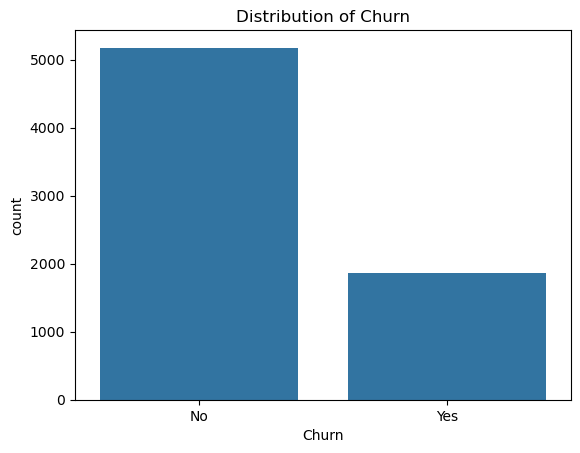

In [7]:
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

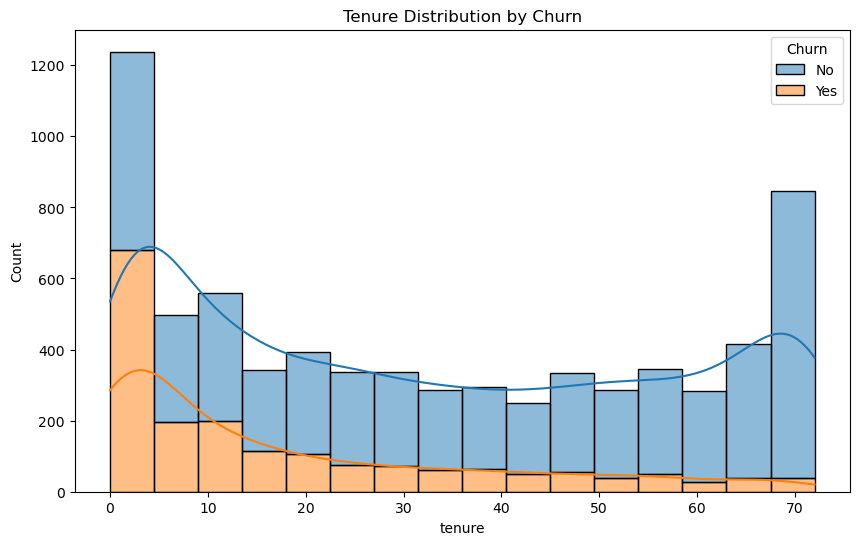

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, multiple='stack')
plt.title('Tenure Distribution by Churn')
plt.show()

In [9]:
data_encoded = pd.get_dummies(df, drop_first=True)

# Standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']])

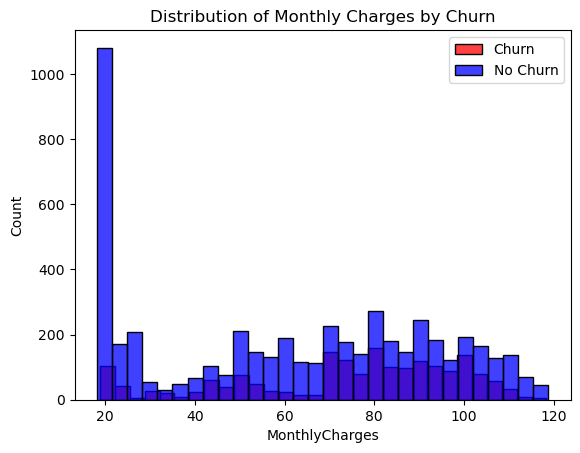

In [10]:
sns.histplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], bins=30, kde=False, color='red', label='Churn')
sns.histplot(df[df['Churn'] == 'No']['MonthlyCharges'], bins=30, kde=False, color='blue', label='No Churn')
plt.legend()
plt.title('Distribution of Monthly Charges by Churn')
plt.show()

In [ ]:
corr_matrix = data_encoded.corr()

# Heatmap of correlations
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
print(data_encoded.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       'customerID_0013-MHZWF', 'customerID_0013-SMEOE',
       ...
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object', length=7073)


In [15]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data_encoded.drop('Churn_Yes', axis=1)
y = data_encoded['Churn_Yes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)

print(f"Logistic Regression - Accuracy: {accuracy_log_reg}, Precision: {precision_log_reg}, Recall: {recall_log_reg}, ROC-AUC: {roc_auc_log_reg}")


Logistic Regression - Accuracy: 0.8116422148603881, Precision: 0.6841004184100419, Recall: 0.5696864111498258, ROC-AUC: 0.7357853758153287


In [17]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predictions
y_pred_tree = decision_tree.predict(X_test)

# Evaluate
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_tree)

print(f"Decision Tree - Accuracy: {accuracy_tree}, Precision: {precision_tree}, Recall: {recall_tree}, ROC-AUC: {roc_auc_tree}")


Decision Tree - Accuracy: 0.7766209181258874, Precision: 0.6071428571428571, Recall: 0.5034843205574913, ROC-AUC: 0.6909884240864129


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Predictions
y_pred_forest = random_forest.predict(X_test)

# Evaluate
accuracy_forest = accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest)
recall_forest = recall_score(y_test, y_pred_forest)
roc_auc_forest = roc_auc_score(y_test, y_pred_forest)

print(f"Random Forest - Accuracy: {accuracy_forest}, Precision: {precision_forest}, Recall: {recall_forest}, ROC-AUC: {roc_auc_forest}")


Random Forest - Accuracy: 0.8031235210601041, Precision: 0.7194444444444444, Recall: 0.45121951219512196, ROC-AUC: 0.6927962408279054


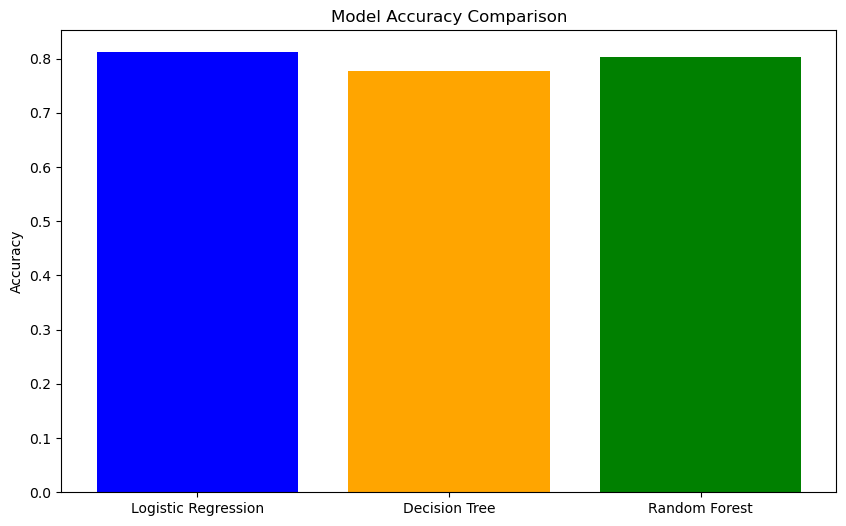

In [19]:

models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_log_reg, accuracy_tree, accuracy_forest]

plt.figure(figsize=(10,6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

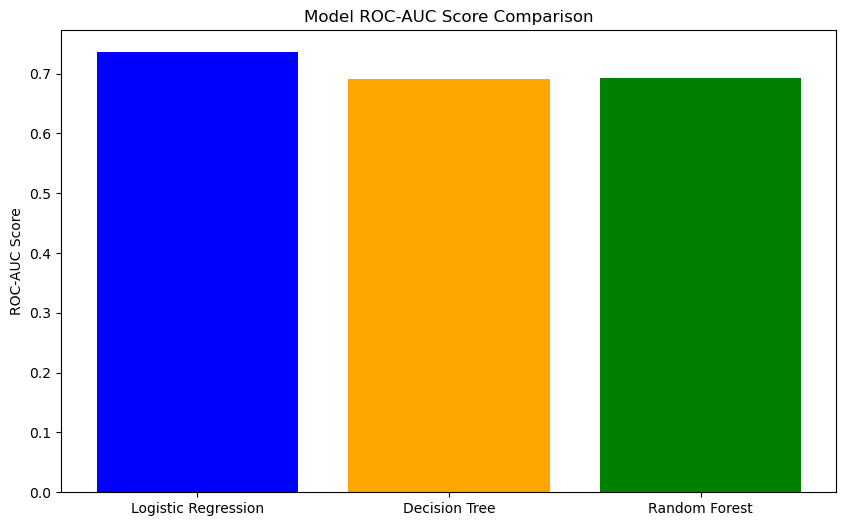

In [20]:
roc_aucs = [roc_auc_log_reg, roc_auc_tree, roc_auc_forest]

plt.figure(figsize=(10,6))
plt.bar(models, roc_aucs, color=['blue', 'orange', 'green'])
plt.title('Model ROC-AUC Score Comparison')
plt.ylabel('ROC-AUC Score')
plt.show()

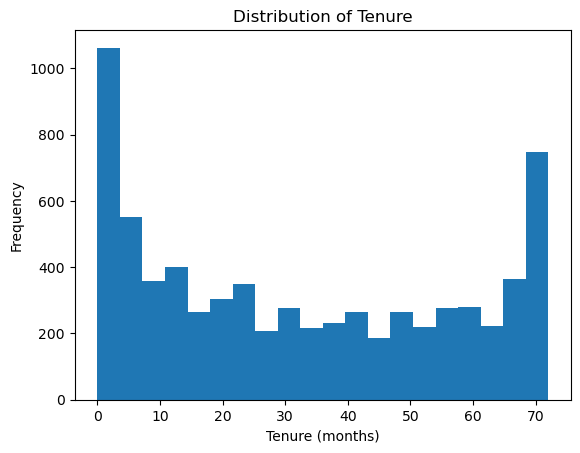

In [22]:
plt.hist(df['tenure'], bins=20)
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
plt.show()

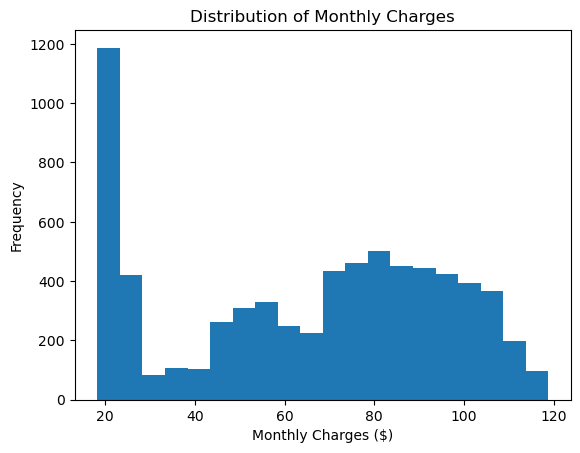

In [23]:
plt.hist(df['MonthlyCharges'], bins=20)
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges')
plt.show()

Text(0.5, 0, 'Contract Type')

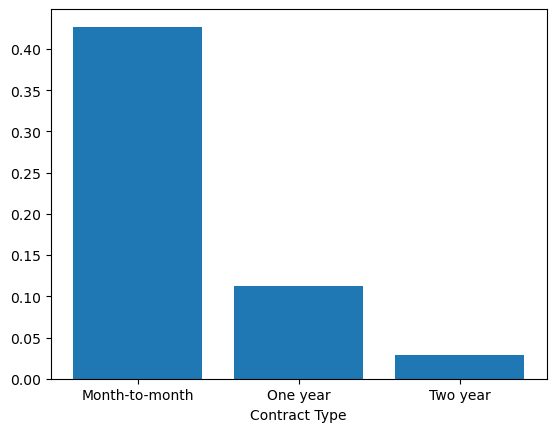

In [27]:
churn_map = {'Yes': 1, 'No': 0}
df['Churn'] = df['Churn'].map(churn_map)

churn_rate_by_contract = df.groupby('Contract')['Churn'].mean()
plt.bar(churn_rate_by_contract.index, churn_rate_by_contract.values)
plt.xlabel('Contract Type')

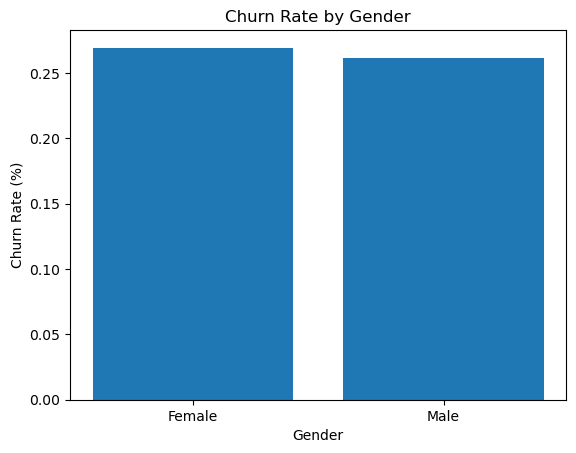

In [29]:
churn_rate_by_gender = df.groupby('gender')['Churn'].mean()
plt.bar(churn_rate_by_gender.index, churn_rate_by_gender.values)
plt.xlabel('Gender')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Gender')
plt.show()